In [126]:
import numpy as np
import pandas as pd
import math
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC
from sklearn.svm import NuSVR, NuSVC
import matplotlib.patches as patches

from scipy.stats import norm
import os
import re

from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

plt.style.use('default')
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['figure.dpi'] = 150
plt.rcParams['legend.fontsize'] = 15

In [135]:
position_df = pd.read_csv('path_position_todest.csv', index_col = None, header = 0)
#print(position_df)
#print(np.asscalar(np.array(position_df['prev_waypoint_y'][0])))
print(np.array(position_df['prev_waypoint_y'])[0])


-0.92011708


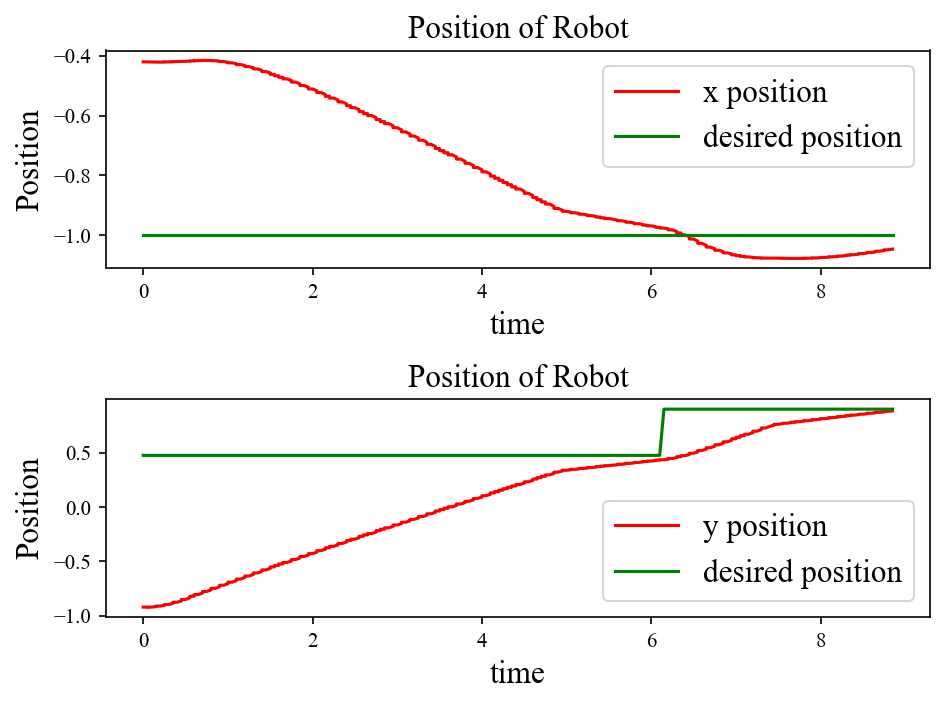

In [136]:
t = np.array(position_df['Sim Time'])
#print(t)
plt.subplot(2,1,1)
x = np.array(position_df['position_x'])
x_d = np.array(position_df['current_waypoint_x'])
plt.plot(t, x,color = 'r',label = 'x position') # plotting t, a separately 
plt.plot(t, x_d,color = 'g',label = 'desired position') 
plt.xlabel('time')
plt.ylabel('Position')
plt.title('Position of Robot')
plt.legend()
plt.subplot(2,1,2)
y = np.array(position_df['position_y'])
y_d = np.array(position_df['current_waypoint_y'])
plt.plot(t, y,color = 'r',label = 'y position') # plotting t, a separately 
plt.plot(t, y_d,color = 'g',label = 'desired position') 
plt.xlabel('time')
plt.ylabel('Position')
plt.title('Position of Robot')
plt.legend()
plt.tight_layout()
plt.savefig("plot of xy_position.png")


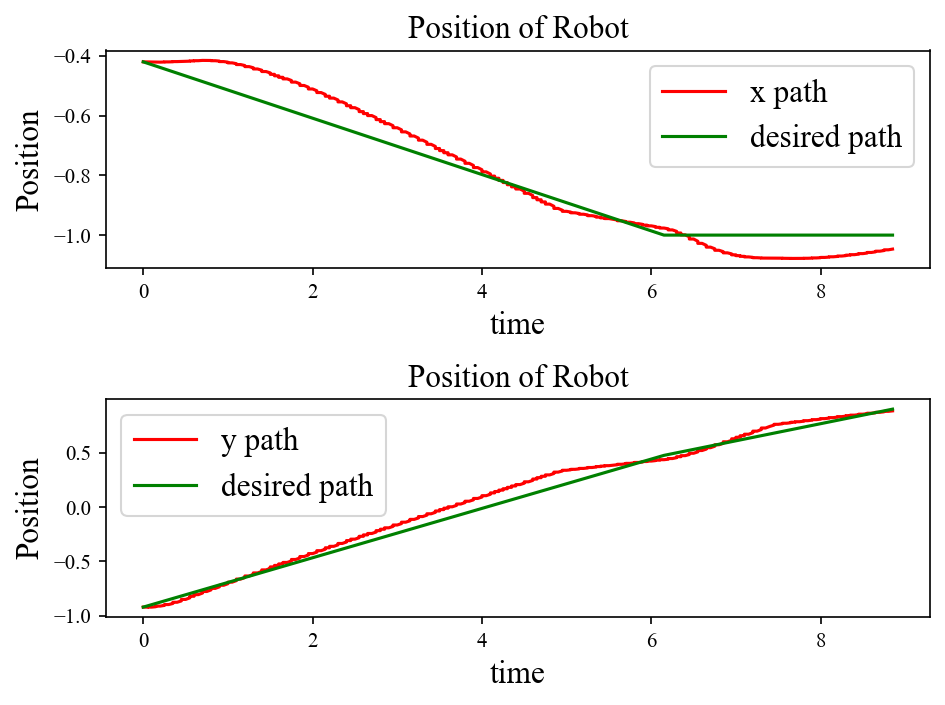

In [137]:
t = np.array(position_df['Sim Time'])
#print(t)
plt.subplot(2,1,1)
x = np.array(position_df['position_x'])
x_d = np.array(position_df['waypoint_x_changed'])
plt.plot(t, x,color = 'r',label = 'x path') # plotting t, a separately 
plt.plot(t, x_d,color = 'g',label = 'desired path') 
plt.xlabel('time')
plt.ylabel('Position')
plt.title('Position of Robot')
plt.legend()
plt.subplot(2,1,2)
y = np.array(position_df['position_y'])
y_d = np.array(position_df['waypoint_y_changed'])
plt.plot(t, y,color = 'r',label = 'y path') # plotting t, a separately 
plt.plot(t, y_d,color = 'g',label = 'desired path') 
plt.xlabel('time')
plt.ylabel('Position')
plt.title('Position of Robot')
plt.legend()
plt.tight_layout()
plt.savefig("plot of xy_position_with path.png")



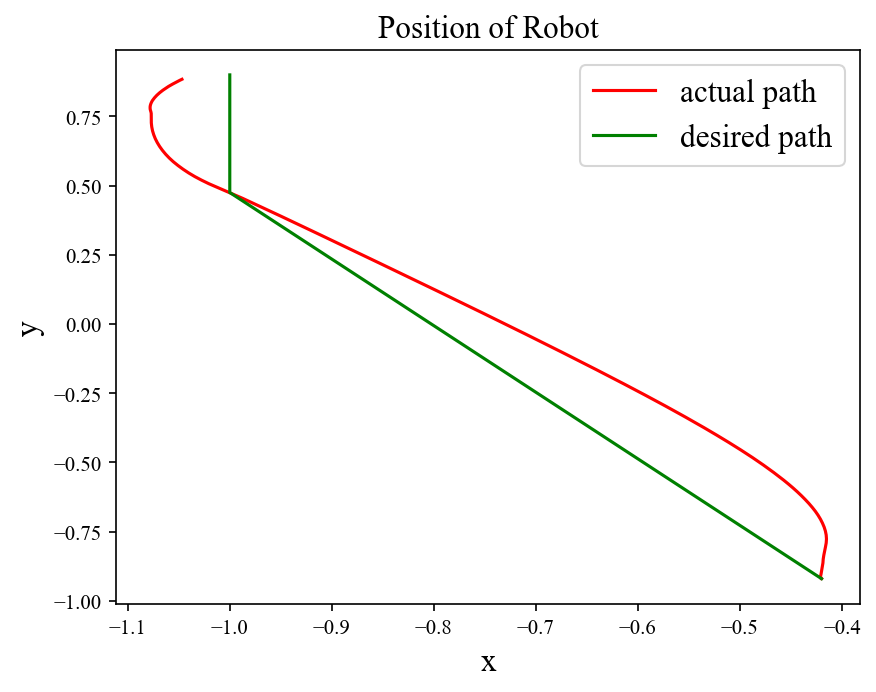

In [138]:
t = np.array(position_df['Sim Time'])
#print(t)
#plt.subplot(2,1,1)
x = np.array(position_df['position_x'])
x_d = np.array(position_df['waypoint_x_changed'])
y = np.array(position_df['position_y'])
y_d = np.array(position_df['waypoint_y_changed'])
plt.plot(x, y,color = 'r',label = 'actual path') # plotting t, a separately 
plt.plot(x_d, y_d,color = 'g',label = 'desired path') 
plt.xlabel('x')
plt.ylabel('y')
plt.title('Position of Robot')
plt.legend()
plt.savefig("plot of path.png")



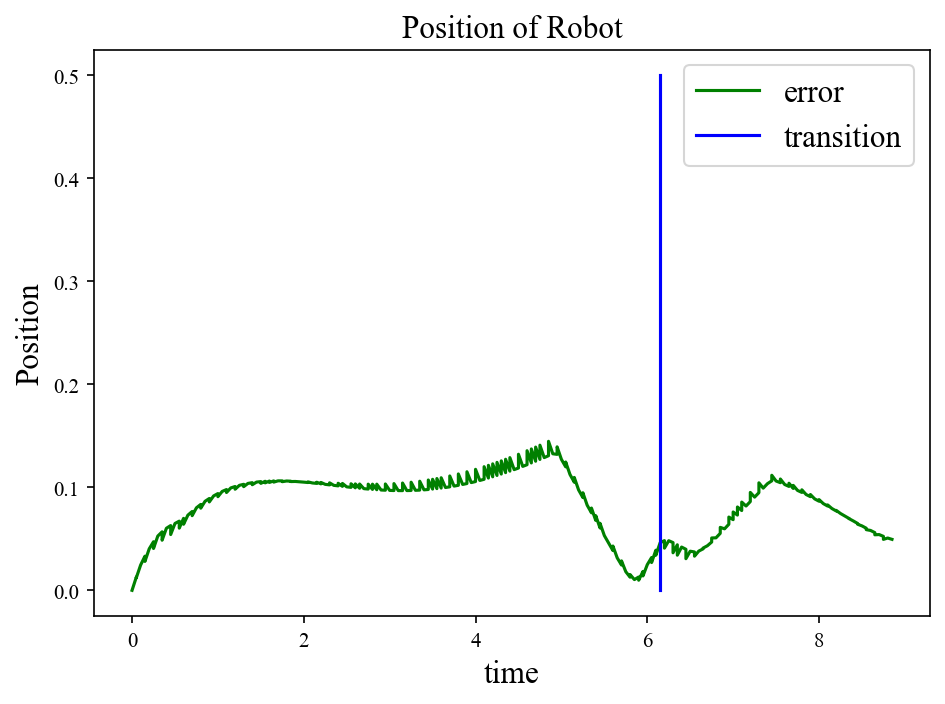

In [139]:
t = np.array(position_df['Sim Time'])
#print(t)
e = np.array(position_df['error'])

transition = position_df.loc[position_df['Sim Time'] == 6.15]
#print(transition)
t_transition = transition['Sim Time']
plt.plot(t, e,color = 'g',label = 'error') # plotting t, a separately 
plt.plot(t_transition, [0,0.5],color = 'b',label = 'transition') 
plt.xlabel('time')
plt.ylabel('Position')
plt.title('Position of Robot')
plt.legend()
plt.tight_layout()
plt.savefig("plot of xy_error.png")




0.16410111300000002


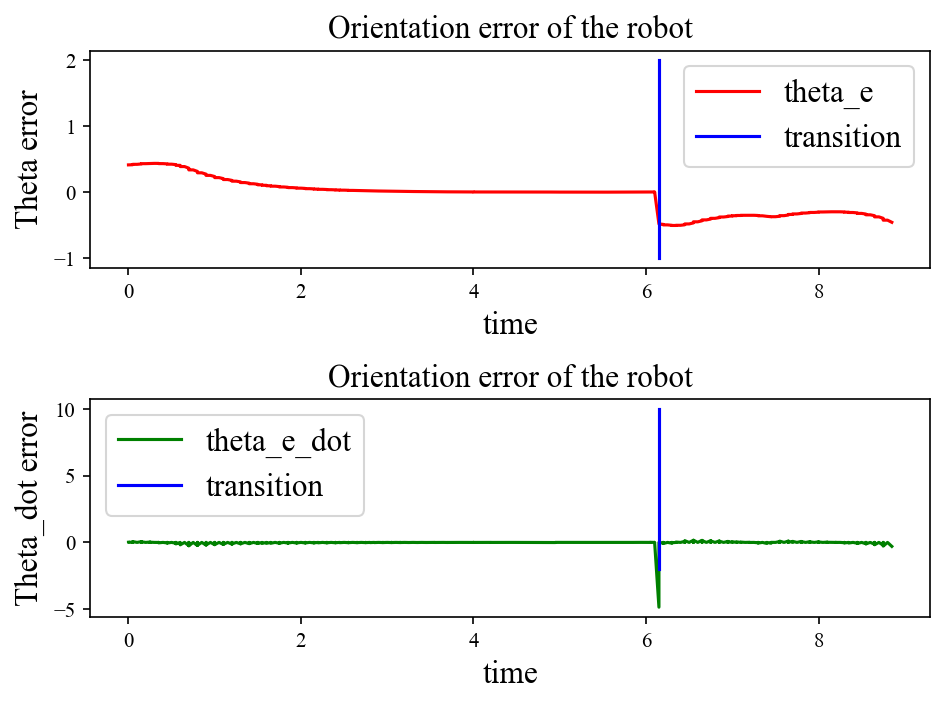

In [144]:
theta_df = pd.read_csv('path_theta_e_todest.csv', index_col = None, header = 0)
#print(position_df)
#print(np.asscalar(np.array(position_df['prev_waypoint_y'][0])))
#print(np.array(position_df['prev_waypoint_y'])[0])
t = np.array(theta_df['Sim Time'])
#print(t)
transition = theta_df.loc[theta_df['Sim Time'] == 6.15]
t_transition = transition['Sim Time']
x = np.array(theta_df['theta_e'])
y = np.array(theta_df['theta_e_dot'])
plt.subplot(2,1,1)

plt.plot(t, x,color = 'r',label = 'theta_e') 
plt.plot(t_transition, [-1,2],color = 'b',label = 'transition') 
plt.xlabel('time')
plt.ylabel('Theta error')
plt.title('Orientation error of the robot')
plt.legend()
plt.subplot(2,1,2)# plotting t, a separately 
plt.plot(t, y,color = 'g',label = 'theta_e_dot') 
plt.plot(t_transition, [-2,10],color = 'b',label = 'transition') 
plt.xlabel('time')
plt.ylabel('Theta_dot error')
plt.title('Orientation error of the robot')
plt.legend()
plt.tight_layout()
plt.savefig("plot of theta error.png")

print(max(y))

